<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Marc Spiegelman,  Based on ipython notebook by Kyle Mandli from his course [Introduction to numerical methods](https://github.com/mandli/intro-numerical-methods)</td>
</table>

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D


# Deriving the Lorenz Equations

The Lorenz Equations are a 3-D dynamical system that is a simplified model of Rayleigh-Benard thermal convection.  They are derived and described in detail in Edward Lorenz' 1963 paper [Deterministic Nonperiodic Flow](http://journals.ametsoc.org/doi/pdf/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2)  in the Journal of Atmospheric Science. 

Here we will just sketch out the key points of the derivation.  A more complete derivation can be found [here](http://stokeslet.ucsd.edu/mae210cdocs/lorenzderivation.pdf)

The key idea is that the Lorenz Equations result from a severely truncated spectral approximation to the 2-D equations for incompressible thermal convection in stream-function/vorticity form.  These equations govern the flow of a buouyant incompressible fluid with a temperature dependent density in a layer of depth $h$, that is heated from below and cooled from the top.  

(Insert a movie here?)

The full coupled set of scaled PDE's describe the coupling of incompressible Navier Stokes flow with an advection-diffusion equation for temperature, and can be written in dimensionless form as,
$$ 
   \frac{1}{\mathrm{Pr}}\left[ \frac{\partial \omega}{\partial t} + \vec{v}\cdot\nabla\omega\right] = \nabla^2\omega + \mathrm{Ra}\frac{\partial T}{\partial x}
$$
$$
    \nabla^2 \psi = -\omega
$$
$$ 
    \frac{\partial T}{\partial t} + \vec{v}\cdot\nabla T = \nabla^2 T
$$

Where 
$$
    \vec{v}=(u,w) = \nabla\times\psi\hat{k}=(\frac{\partial\psi}{\partial y},- \frac{\partial\psi}{\partial x})
$$ 
is the fluid velocity field (which in this form is exactly incompressible with $\nabla\cdot\vec{v}=0$).  $\psi$ is the "Streamfunction"  whose contours are tangent to the fluid trajectories at all times.  The vorticity,
$$
    \omega\hat{k} = \nabla\times\vec{v}
$$ 
measures the local rate of rotation of the fluid, and is driven by horizontal variations in temperature (actually density).  

Boundary conditions for Temperature are $T=1$ on the bottom of the layer and $T=0$ on the top.  In the absence of any fluid motion (\omega=\vec{v}=0),  the temperature field is just a steady conductive ramp with 
$$ 
    T = 1 - y
$$
Thus we can also solve for the perturbation away from this steady state by substituting
$$
    T = 1 - y +\theta(x,y,t)
$$
into the energy equation to solve for the perturbed temperature using
$$ 
    \frac{\partial \theta}{\partial t} + \vec{v}\cdot\nabla \theta = \nabla^2\theta + w
$$

### Parameters
In dimensionless form,  these equations have two important dimensionless numbers that control the structure and behavior of the convection.  

#### The Prandtl Number
  The first is the "Prandtl Number", $\mathrm{Pr} = \frac{\nu}{\kappa}$  which is the ratio of the fluid viscosity $\nu$ to the thermal diffusivitiy $\kappa$.  Since both vorticity and Temperature both obey advection diffusion equations (and viscosity acts to diffuse momentum/vorticity),  the Prandtl number is a measure of whether momemtum or energy is more dissipative.
  
#### The Rayleigh Number
The second key parameter is the Rayleigh number 
$$
    \mathrm{Ra} = \frac{g\alpha(T_1 - T_0)h^3}{\nu\kappa}
$$
which measures the balance of forces that drive convection (i.e. gravity, or temperature differences), to those that damp convection such as viscosity and thermal diffusivity.  Systems with large Rayleigh numbers are prone to vigorous convection.  However, it was shown by Rayleigh, that there is a critical value of the Rayleigh Number $\mathrm{Ra}_c$ below which there is no convection.  This value depends on the size of the convection cell and boundary conditions for stress on the fluid,  however, for the simplest case of a layer with no-slip top and bottom boundary conditions and cell with aspect ratio  $a=h/L$ (with $h$ the layer depth and $L$ the width of the convection cell), then the critical Ra number is
$$
\mathrm{Ra}_c = \pi^4 (1 + a^2)^3/a^2
$$
which has a minimum value for $a^2=1/2$.  

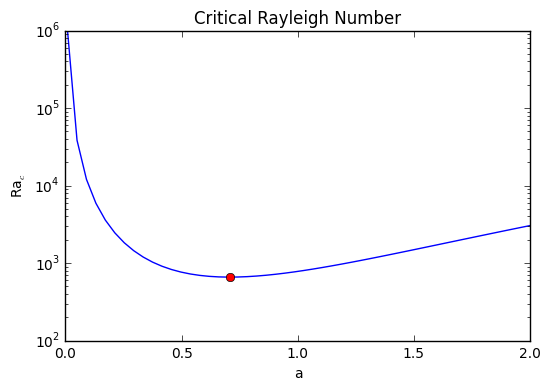

In [22]:
# show Ra vs a
a = np.linspace(0.01,2.)
Rc = np.pi**4*(1. + a**2)**3/a**2
plt.figure()
plt.semilogy(a,Rc)
amin = np.sqrt(1./2.)
Rcmin = np.pi**4*(1. + amin**2)**3/amin**2
plt.hold(True)
plt.semilogy(amin,Rcmin,'ro')
plt.xlabel('a')
plt.ylabel('Ra$_c$')
plt.title('Critical Rayleigh Number')
plt.show()

## Spectral decomposition

We next expand the streamfunction and Temperature fields in terms of a highly truncated Fourier Series where
the streamfunction contains one cellular mode

$$
    \psi(x,y,t) = X(t)\sin(a\pi x)\sin(\pi y)
$$

and Temperature has two modes

$$
    T(x,y,t) = Y(t)\cos(a\pi x)\sin(\pi y) - Z(t)\sin(2\pi y)
$$

Where $X(t)$, $Y(t)$ and $Z(t)$ are the time dependent amplitudes of each mode.  The spatial components of each mode looks like

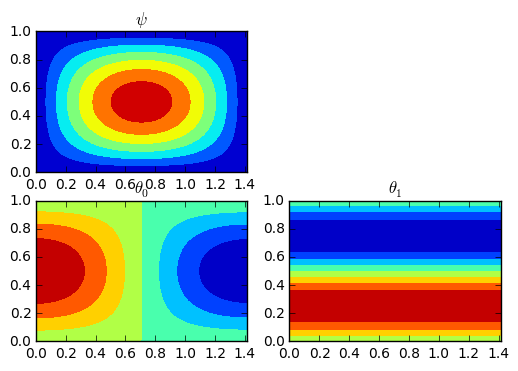

In [23]:
a = np.sqrt(0.5)
x = np.linspace(0,1./a)
y = np.linspace(0.,1.)
X,Y = np.meshgrid(x,y)

psi = np.sin(a*np.pi*X)*np.sin(np.pi*Y)
theta0 = np.cos(a*np.pi*X)*np.sin(np.pi*Y)
theta1 = -np.sin(2.*np.pi*Y)

plt.figure()
plt.subplot(2,2,1)
plt.contourf(X,Y,psi)
plt.title('$\psi$')
plt.subplot(2,2,3)
plt.contourf(X,Y,theta0)
plt.title('$\\theta_0$')
plt.subplot(2,2,4)
plt.contourf(X,Y,theta1)
plt.title('$\\theta_1$')
plt.show()

and for our initial condition $X(0) = 2$, $Y(0) = 3$, $Z(0) = 4$,  the streamfunction and Temperature fields would look like

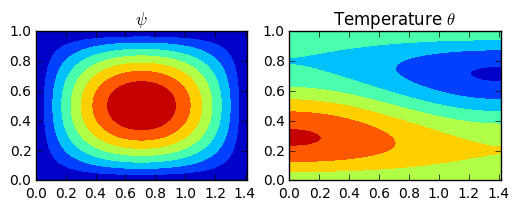

In [24]:
plt.figure()
plt.subplot(1,2,1)
plt.contourf(X,Y,2.*psi)
plt.gca().set_aspect('equal')
plt.title('$\psi$')
plt.subplot(1,2,2)
plt.contourf(X,Y,3*theta0 + 4*theta1)
plt.gca().set_aspect('equal')
plt.title('Temperature $\\theta$')
plt.show()